<a href="https://colab.research.google.com/github/hosein-jamshidian/Persian_Speech_to_Text/blob/main/persian_speech_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

import os
import random
import shutil

In [2]:
!pip install python_speech_features # for feature extraction

!pip install python-Levenshtein

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=3b350f9a4321945d4da381616e4c73131be248e3f20c5f39e58e75ea86534339
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.5/172.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.2 MB/s eta 0:00:00


In [3]:
!unzip /content/drive/MyDrive/DATASETS/audios/Persian-Speech-To-Text-Audios.zip

Archive:  /content/drive/MyDrive/DATASETS/audios/Persian-Speech-To-Text-Audios.zip
   creating: Persian-Speech-To-Text-Audios/
  inflating: Persian-Speech-To-Text-Audios/12440123.wav  
  inflating: Persian-Speech-To-Text-Audios/12440124.wav  
  inflating: Persian-Speech-To-Text-Audios/12440126.wav  
  inflating: Persian-Speech-To-Text-Audios/12440127.wav  
  inflating: Persian-Speech-To-Text-Audios/12440128.wav  
  inflating: Persian-Speech-To-Text-Audios/12440129.wav  
  inflating: Persian-Speech-To-Text-Audios/12440130.wav  
  inflating: Persian-Speech-To-Text-Audios/12440135.wav  
  inflating: Persian-Speech-To-Text-Audios/12440141.wav  
  inflating: Persian-Speech-To-Text-Audios/12440143.wav  
  inflating: Persian-Speech-To-Text-Audios/12440145.wav  
  inflating: Persian-Speech-To-Text-Audios/12440146.wav  
  inflating: Persian-Speech-To-Text-Audios/12440147.wav  
  inflating: Persian-Speech-To-Text-Audios/12440155.wav  
  inflating: Persian-Speech-To-Text-Audios/12440156.wav  
  i

In [4]:
df=pd.read_excel('/content/drive/MyDrive/DATASETS/audios/Persian-Speech-To-Text-Maps.xlsx')
df.head()

,audio,text
0,myaudio/12440123.wav,آبنبات های تومک را گرفت گفت ممنون پسرم نه من ...
1,myaudio/12440124.wav,قبلا هم به تو گفتم هیچ وقتم استراحت ندارم فقط ...
2,myaudio/12440126.wav,می شد او را یک فیلسوف به حساب آورد او عاشق چیز...
3,myaudio/12440127.wav,اگر تومک فراموش می کرد برایش آبنبات بیاورد درس...
4,myaudio/12440128.wav,نان های ادویه دار قلبی شکل را بیشتر دوست داشت ...


In [5]:
df.shape

(500, 2)

In [6]:
df.isnull().sum()

audio    0
text     0
dtype: int64

In [7]:
nums=[i for i in range(0,500)]
random.shuffle(nums)

In [8]:
train_size=int(len(nums)*.8)
val_size=int(len(nums)*.15)
test_size=int(len(nums)*.05)

train=nums[:train_size]
val=nums[train_size:(train_size+val_size)]
test=nums[(train_size+val_size):(train_size+val_size+test_size)]

In [10]:
df.loc[train,'datasplit']='train'
df.loc[val,'datasplit']='val'
df.loc[test,'datasplit']='test'

In [11]:
df['datasplit'].value_counts()

train    400
val       75
test      25
Name: datasplit, dtype: int64

In [12]:
!mkdir train
!mkdir test
!mkdir val

In [13]:
def move_files(row):
    if row['datasplit'] == 'train':
        row['audio'] = 'train/' + row['audio'].split('/')[1]
        shutil.move('/content/Persian-Speech-To-Text-Audios/' +row['audio'].split('/')[1], row['audio'])

    elif row['datasplit'] == 'val':
        row['audio'] = 'val/' + row['audio'].split('/')[1]
        shutil.move('/content/Persian-Speech-To-Text-Audios/' +row['audio'].split('/')[1], row['audio'])

    elif row['datasplit'] == 'test':
        row['audio'] = 'test/' + row['audio'].split('/')[1]
        shutil.move('/content/Persian-Speech-To-Text-Audios/' + row['audio'].split('/')[1], row['audio'])

    return row

In [14]:
df = df.apply(move_files, axis=1)

In [15]:
# Preprocessing

In [16]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav

from IPython.display import Audio
from IPython.display import display

In [17]:
sample = 'test/'
sample += os.listdir(sample)[0]

(rate,sig) = wav.read(sample)

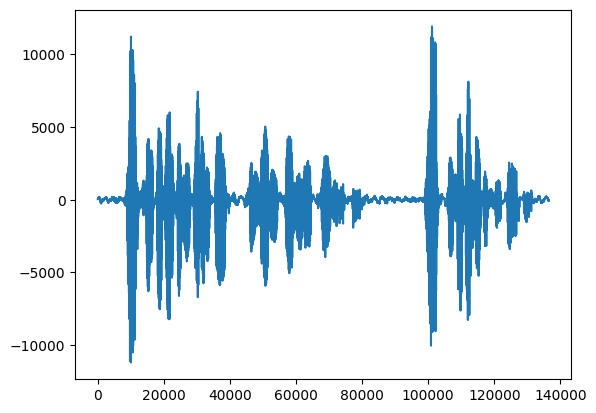

In [18]:
plt.plot(sig)
plt.show()

In [19]:
sample_audio= Audio(sample, autoplay=False)
display(sample_audio)

In [20]:
mfcc_features = mfcc(sig,rate)
print(mfcc_features.shape)

(852, 13)


In [21]:
df['MFCC features'] = None

In [22]:
df.head()

,audio,text,datasplit,MFCC features
0,train/12440123.wav,آبنبات های تومک را گرفت گفت ممنون پسرم نه من ...,train,None
1,train/12440124.wav,قبلا هم به تو گفتم هیچ وقتم استراحت ندارم فقط ...,train,None
2,val/12440126.wav,می شد او را یک فیلسوف به حساب آورد او عاشق چیز...,val,None
3,train/12440127.wav,اگر تومک فراموش می کرد برایش آبنبات بیاورد درس...,train,None
4,train/12440128.wav,نان های ادویه دار قلبی شکل را بیشتر دوست داشت ...,train,None


In [23]:
for i in tqdm(range(500)):
    file_name = df.loc[i, 'audio']
    (rate,sig) = wav.read(file_name)
    mfcc_features = mfcc(sig,rate)
    df.loc[i, 'MFCC features'] = [mfcc_features]

<ipython-input-23-e269bd30e0a8>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(500)):


  0%|          | 0/500 [00:00<?, ?it/s]

In [24]:
df.head()

,audio,text,datasplit,MFCC features
0,train/12440123.wav,آبنبات های تومک را گرفت گفت ممنون پسرم نه من ...,train,"[[[11.53494370737191, -3.370294705789073, -4.2..."
1,train/12440124.wav,قبلا هم به تو گفتم هیچ وقتم استراحت ندارم فقط ...,train,"[[[10.105730436984143, -2.4352324174037987, -3..."
2,val/12440126.wav,می شد او را یک فیلسوف به حساب آورد او عاشق چیز...,val,"[[[9.91634332069268, -2.559946185140254, -4.98..."
3,train/12440127.wav,اگر تومک فراموش می کرد برایش آبنبات بیاورد درس...,train,"[[[11.225249404021213, -3.406866944024387, -2...."
4,train/12440128.wav,نان های ادویه دار قلبی شکل را بیشتر دوست داشت ...,train,"[[[8.637159353566885, -2.757131992489463, -5.7..."


In [25]:
unique_chars=pd.unique(list(df['text'].sum()))
unique_chars.sort()
unique_chars

array([' ', 'آ', 'أ', 'ئ', 'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ',
       'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ل',
       'م', 'ن', 'ه', 'و', 'ً', 'پ', 'چ', 'ژ', 'ک', 'گ', 'ی'],
      dtype=object)

In [41]:
#remove some charachters:

remove_char= {'آ':'ا',
              'أ':'ا',
              'ئ':'ی',
              unique_chars[30]:'ن'}

In [47]:
remove_charachters={ord(key):ord(remove_char[key]) for key in remove_char}
# ord(): function returns the number representing the unicode code of a specified character.

remove_charachters

{1570: 1575, 1571: 1575, 1574: 1740, 1611: 1606}

In [50]:
df['text']= df['text'].apply(lambda x : x.translate(remove_charachters))

In [66]:
# now the clear unique values.

unique_chars=pd.unique(list(df['text'].sum()))
unique_chars.sort()
unique_chars

array([' ', 'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س',
       'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ل', 'م', 'ن', 'ه',
       'و', 'پ', 'چ', 'ژ', 'ک', 'گ', 'ی'], dtype=object)

In [67]:
unique_chars = ['-', '<PAD>', '<S>', '<E>'] + unique_chars.tolist()

In [68]:
char_to_int = {char: index for index, char in enumerate(unique_chars)}
int_to_char = {index: char for index, char in enumerate(unique_chars)}

In [126]:
# 0 for blank , 1 for padding , 2 for start , 3 for end.
#bayad befor, MFCC features dar biad banabarin az [np.array()] estefade kardam.

def tokenize(text):
  clean= [np.array([2]+[char_to_int[char] for char in text]+[3])]
  return clean

In [127]:
df['text_tokenized']= df['text'].apply(tokenize)

In [128]:
df.head()

,audio,text,datasplit,MFCC features,text_tokenized
0,train/12440123.wav,ابنبات های تومک را گرفت گفت ممنون پسرم نه من ...,train,"[[[11.53494370737191, -3.370294705789073, -4.2...","[[2, 5, 6, 28, 6, 5, 7, 4, 29, 5, 36, 4, 7, 30..."
1,train/12440124.wav,قبلا هم به تو گفتم هیچ وقتم استراحت ندارم فقط ...,train,"[[[10.105730436984143, -2.4352324174037987, -3...","[[2, 25, 6, 26, 5, 4, 29, 27, 4, 6, 29, 4, 7, ..."
2,val/12440126.wav,می شد او را یک فیلسوف به حساب اورد او عاشق چیز...,val,"[[[9.91634332069268, -2.559946185140254, -4.98...","[[2, 27, 36, 4, 17, 12, 4, 5, 30, 4, 14, 5, 4,..."
3,train/12440127.wav,اگر تومک فراموش می کرد برایش ابنبات بیاورد درس...,train,"[[[11.225249404021213, -3.406866944024387, -2....","[[2, 5, 35, 14, 4, 7, 30, 27, 34, 4, 24, 14, 5..."
4,train/12440128.wav,نان های ادویه دار قلبی شکل را بیشتر دوست داشت ...,train,"[[[8.637159353566885, -2.757131992489463, -5.7...","[[2, 28, 5, 28, 4, 29, 5, 36, 4, 5, 12, 30, 36..."


## Dataset

In [129]:
from torch.utils.data import Dataset, DataLoader

In [140]:
df.iloc[0].to_dict()

{'audio': 'train/12440123.wav',
 'text': 'ابنبات های تومک را گرفت  گفت ممنون پسرم نه من هیچ وقت کار ندارم',
 'datasplit': 'train',
 'MFCC features': [array([[ 11.53494371,  -3.37029471,  -4.25456008, ...,   0.86670845,
            3.30492685,  -1.81752797],
         [  9.52315271,   3.94744387,  -8.41656807, ...,   6.82892904,
            6.1735962 ,   4.46501288],
         [ 10.0279746 ,   2.12419706, -11.54897459, ...,  15.44179426,
            9.16408181,  -1.64864382],
         ...,
         [  9.27767515,   0.07618757,  -9.46000787, ...,  -1.08366923,
           12.5950049 ,  17.7379736 ],
         [  8.81197544,   1.82406492,  -6.58570617, ...,  -7.84185061,
           15.34025943,  13.73292849],
         [  9.17644942,  -4.12734486,   0.23775852, ...,  -4.81752852,
           10.75281863,   9.80562286]])],
 'text_tokenized': [array([ 2,  5,  6, 28,  6,  5,  7,  4, 29,  5, 36,  4,  7, 30, 27, 34,  4,
         14,  5,  4, 35, 14, 24,  7,  4,  4, 35, 24,  7,  4, 27, 27, 28, 30,
   

In [131]:
class ASR_dataset(Dataset):
  def __init__(self, df, subset):
    super().__init__()

    self.df= df[df['datasplit']==subset].reindex()

  def __len__(self):
    return self.df.shape[0]

  def __getitem__(self,i):
    row= self.df.iloc[i]
    return row['MFCC features'][0], row['text_tokenized'][0], row['text']

In [142]:
train_dataset= ASR_dataset(df, 'train')
val_dataset= ASR_dataset(df, 'val')
test_dataset= ASR_dataset(df, 'test')

In [147]:
train_dataset[0]

(array([[ 11.53494371,  -3.37029471,  -4.25456008, ...,   0.86670845,
           3.30492685,  -1.81752797],
        [  9.52315271,   3.94744387,  -8.41656807, ...,   6.82892904,
           6.1735962 ,   4.46501288],
        [ 10.0279746 ,   2.12419706, -11.54897459, ...,  15.44179426,
           9.16408181,  -1.64864382],
        ...,
        [  9.27767515,   0.07618757,  -9.46000787, ...,  -1.08366923,
          12.5950049 ,  17.7379736 ],
        [  8.81197544,   1.82406492,  -6.58570617, ...,  -7.84185061,
          15.34025943,  13.73292849],
        [  9.17644942,  -4.12734486,   0.23775852, ...,  -4.81752852,
          10.75281863,   9.80562286]]),
 array([ 2,  5,  6, 28,  6,  5,  7,  4, 29,  5, 36,  4,  7, 30, 27, 34,  4,
        14,  5,  4, 35, 14, 24,  7,  4,  4, 35, 24,  7,  4, 27, 27, 28, 30,
        28,  4, 31, 16, 14, 27,  4, 28, 29,  4, 27, 28,  4, 29, 36, 32,  4,
        30, 25,  7,  4, 34,  5, 14,  4, 28, 12,  5, 14, 27,  3]),
 'ابنبات های تومک را گرفت  گفت ممنون پسرم ن